### Kielder data summaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math

font = {'size'   : 14}
plt.rc('font', **font)
plt.rcParams['text.usetex'] = True

### NOTE: years manually relabeled to 1=2004, 2=2005 manually in Excel.

In [2]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
                   sheet_name='Burden Data')
pivot_table = pd.pivot_table(df, values=['Larvae', 'Nymphs', 'ricinusL', 'ricinusN', 'triangulicepsL', 'triangulicepsN'], 
                       index=['Species'],
                       aggfunc="sum")
pivot_table

,Larvae,Nymphs,ricinusL,ricinusN,triangulicepsL,triangulicepsN
Species,,,,,,
BV,0,0,0,0,0,0
FV,3123,461,1608,37,1196,82
NF,2,0,0,0,2,0
SA,2579,230,765,14,1814,216
SM,1,0,0,0,1,0


In [3]:
# Going forward, don't worry about these three vertebrate species
df = df[(df['Species'] == 'FV') | (df['Species'] == 'SA')]

In [4]:
# Are there any verterbrates with duplicate ID numbers?
duplicatedID = df[df.duplicated(['ID'])]
print(len(duplicatedID))
# This seems to indicate that no two observations are of the same verterbrate.

0


In [5]:
# Nymphal burden per species

pivot_table = pd.pivot_table(df, values=['Larvae', 'Nymphs', 'ricinusL', 'ricinusN', 'triangulicepsL', 'triangulicepsN'], 
                                                    index=['Species','Year'],
                                                    aggfunc="sum")
pivot_table


Larvae  Nymphs  ricinusL  ricinusN  triangulicepsL  \
Species Year                                                       
FV      2004     629     158       150        13             432   
        2005    2494     303      1458        24             764   
SA      2004    1753     151       451        14            1302   
        2005     826      79       314         0             512   

              triangulicepsN  
Species Year                  
FV      2004               4  
        2005              78  
SA      2004             137  
        2005              79

These counts do not match for FV, why?

Assume that Nymphs, Larvae are incorrect, use ricinusL, ricinusN, triangulicepsL, triangulicepsN
For convenience, reasign Nymphs = ricinusN + triangulicepsN, etc

In [6]:
df["Nymphs"] = df["ricinusN"] + df["triangulicepsN"]
df["Larvae"] = df["ricinusL"] + df["triangulicepsL"]
df["Total"] = df["Nymphs"] + df["Larvae"] # Going to use tick totals later

pivot_table = pd.pivot_table(df, values=['Total', 'Larvae', 'Nymphs', 'ricinusL', 'ricinusN', 'triangulicepsL', 'triangulicepsN'], 
                                 index=['Species','Year'],
                                 aggfunc="sum")
pivot_table

Larvae  Nymphs  Total  ricinusL  ricinusN  triangulicepsL  \
Species Year                                                              
FV      2004     582      17    599       150        13             432   
        2005    2222     102   2324      1458        24             764   
SA      2004    1753     151   1904       451        14            1302   
        2005     826      79    905       314         0             512   

              triangulicepsN  
Species Year                  
FV      2004               4  
        2005              78  
SA      2004             137  
        2005              79

In [7]:
nymphal_hosts = df[((df['ricinusN'] > 0) | (df['triangulicepsN'] > 0))]

hosts_with_ricinusN_hostcount = len(nymphal_hosts[(nymphal_hosts['ricinusN'] > 0)])
hosts_with_triangulicepsN_hostcount = len(nymphal_hosts[(nymphal_hosts['triangulicepsN'] > 0)])

FV_ricinusN_hostcount = len(nymphal_hosts[(nymphal_hosts['Species'] == 'FV') & (nymphal_hosts['ricinusN'] > 0)])
FV_triangulicepsN_hostcount = len(nymphal_hosts[(nymphal_hosts['Species'] == 'FV') & (nymphal_hosts['triangulicepsN'] > 0)])
SA_ricinusN_hostcount = len(nymphal_hosts[(nymphal_hosts['Species'] == 'SA') & (nymphal_hosts['ricinusN'] > 0)])
SA_triangulicepsN_hostcount = len(nymphal_hosts[(nymphal_hosts['Species'] == 'SA') & (nymphal_hosts['triangulicepsN'] > 0)])

FV_ricinusN_triangulicepsN_hostcount = len(nymphal_hosts[(nymphal_hosts['Species'] == 'FV')])
SA_ricinusN_triangulicepsN_hostcount = len(nymphal_hosts[(nymphal_hosts['Species'] == 'SA')])

print("Counts of co-aggregation observations")
print("{} & {}: {}".format("SA + FV", "ricinusN", hosts_with_ricinusN_hostcount))
print("{} & {}: {}".format("SA + FV", "triangulicepsN", hosts_with_triangulicepsN_hostcount))

print("{} & {}: {}".format("FV", "ricinusN OR triangulicepsN", FV_ricinusN_triangulicepsN_hostcount))
print("{} & {}: {}".format("SA", "ricinusN OR triangulicepsN", SA_ricinusN_triangulicepsN_hostcount))

print("{} & {}: {}".format("FV", "ricinusN", FV_ricinusN_hostcount))
print("{} & {}: {}".format("FV", "triangulicepsN", FV_triangulicepsN_hostcount))
print("{} & {}: {}".format("SA", "ricinusN", SA_ricinusN_hostcount))
print("{} & {}: {}".format("SA", "triangulicepsN", SA_triangulicepsN_hostcount))

# These vector lengths determine the numbers of observations upon which MLE can be used to fit distributions to coaggregation data

# If we were to concentrate on vertebrate + tick species pairs, then SA-trianguliceps will have the most number of ticks and the most numbers of vertebrates
# If we considered a second vertebrate + tick pair, then FV-trianguliceps would be the second pick
# Should we look at I.trianguliceps for both species together, an individual analysis for both host species, or just one host species?
# To look into I. ricinus, use both species of vertebrates. This is appropriate, because that tick species is non-nidicolous
# Is there any point to looking at each vertebrate species idividually with all tick species?

Counts of co-aggregation observations
SA + FV & ricinusN: 31
SA + FV & triangulicepsN: 169
FV & ricinusN OR triangulicepsN: 82
SA & ricinusN OR triangulicepsN: 113
FV & ricinusN: 18
FV & triangulicepsN: 65
SA & ricinusN: 13
SA & triangulicepsN: 104


In [8]:
# Get the ricinus larval burdens for vertebrates that have ricinus nymphs

ricinus_nymphal_hosts = df[(df['ricinusN'] > 0)]
ricinus_nymphal_table = pd.pivot_table(ricinus_nymphal_hosts, values=['ricinusL', 'ricinusN'], 
                                                              index=['Species', 'Year'],
                                                              aggfunc="sum")
ricinus_nymphal_table

ricinusL  ricinusN
Species Year                    
FV      2004         7        13
        2005       190        24
SA      2004        48        14

In [9]:
# Get the trianguliceps larval burdens for vertebrates that have trianguliceps nymphs

trianguliceps_nymphal_hosts = df[(df['triangulicepsN'] > 0)]
trianguliceps_nymphal_table = pd.pivot_table(trianguliceps_nymphal_hosts, values=['triangulicepsL', 'triangulicepsN'], 
                                                                           index=['Species', 'Year'],
                                                                         aggfunc="sum")
trianguliceps_nymphal_table

triangulicepsL  triangulicepsN
Species Year                                
FV      2004               1               4
        2005               9              78
SA      2004             369             137
        2005             179              79

In [10]:
# Now, what is the average nymphal burden for each species, among individuals that have nymphs?
# This is useful if you assume that all species of nymph can infect all species of larvae

pivot_table = pd.pivot_table(nymphal_hosts, values=['ricinusL', 'ricinusN', 'triangulicepsL', 'triangulicepsN'], 
                                                    index=['Species', 'Year'],
                                                    aggfunc="sum")
pivot_table


ricinusL  ricinusN  triangulicepsL  triangulicepsN
Species Year                                                    
FV      2004         8        13               1               4
        2005       242        24              14              78
SA      2004       180        14             377             137
        2005        80         0             179              79

In [11]:
FV_ricinusN_nymphcount = pivot_table.loc['FV','ricinusN']
FV_triangulicepsN_nymphcount = pivot_table.loc['FV','triangulicepsN']
SA_ricinusN_nymphcount = pivot_table.loc['SA','ricinusN']
SA_triangulicepsN_nymphcount = pivot_table.loc['SA','triangulicepsN']

FV_ricinusN_mean = FV_ricinusN_nymphcount / FV_ricinusN_hostcount
FV_triangulicepsN_mean = FV_triangulicepsN_nymphcount / FV_triangulicepsN_hostcount
SA_ricinusN_mean = SA_ricinusN_nymphcount / SA_ricinusN_hostcount
SA_triangulicepsN_mean = SA_triangulicepsN_nymphcount / SA_triangulicepsN_hostcount

print("FV & ricinusN mean nymphal burden: {}".format(FV_ricinusN_mean))
print("FV & triangulicepsN mean nymphal burden: {}".format(FV_triangulicepsN_mean))
print("SA & ricinusN mean nymphal burden: {}".format(SA_ricinusN_mean))
print("SA & triangulicepsN mean nymphal burden: {}".format(SA_triangulicepsN_mean))


FV & ricinusN mean nymphal burden: Year
2004    0.722222
2005    1.333333
Name: ricinusN, dtype: float64
FV & triangulicepsN mean nymphal burden: Year
2004    0.061538
2005    1.200000
Name: triangulicepsN, dtype: float64
SA & ricinusN mean nymphal burden: Year
2004    1.076923
2005    0.000000
Name: ricinusN, dtype: float64
SA & triangulicepsN mean nymphal burden: Year
2004    1.317308
2005    0.759615
Name: triangulicepsN, dtype: float64


In [12]:
# Now, what is the average larval burden per nymph for each species?

FV_ricinusL_larvalcount = pivot_table.loc['FV','ricinusL']
FV_triangulicepsL_larvalcount = pivot_table.loc['FV','triangulicepsL']
SA_ricinusL_larvalcount = pivot_table.loc['SA','ricinusL']
SA_triangulicepsL_larvalcount = pivot_table.loc['SA','triangulicepsL']

FV_ricinus_transmission_potential = FV_ricinusL_larvalcount * FV_ricinusN_nymphcount
FV_trianguliceps_transmission_potential = FV_triangulicepsL_larvalcount * FV_triangulicepsN_nymphcount
SA_ricinus_transmission_potential = SA_ricinusL_larvalcount * SA_ricinusN_nymphcount
SA_trianguliceps_transmission_potential = SA_triangulicepsL_larvalcount * SA_triangulicepsN_nymphcount

print("FV & ricinus potential transmissions: {}".format(FV_ricinus_transmission_potential))
print("FV & trianguliceps potential transmissions: {}".format(FV_trianguliceps_transmission_potential))
print("SA & ricinus potential transmissions: {}".format(SA_ricinus_transmission_potential))
print("SA & trianguliceps potential transmissions: {}".format(SA_trianguliceps_transmission_potential))

FV & ricinus potential transmissions: Year
2004     104
2005    5808
dtype: int64
FV & trianguliceps potential transmissions: Year
2004       4
2005    1092
dtype: int64
SA & ricinus potential transmissions: Year
2004    2520
2005       0
dtype: int64
SA & trianguliceps potential transmissions: Year
2004    51649
2005    14141
dtype: int64


Then this appears to be a good reason to do separate analyses for each of the different tick and host species:

- I. ricinus nymph on SA to I. ricinus nymph on SA
- I. ricinus nymph on FV to I. ricinus nymph on FV
- I. trianguliceps nymph on SA to I. trianguliceps nymph on SA
- I. trianguliceps nymph on FV to I. trianguliceps nymph on FV

That should be the minimum analysis.

The question remains of whether or not to model transmission within a tick species between two host species: 

- I. ricinus nymph on SA to I. ricinus nymph on FV
- I. ricinus nymph on FV to I. ricinus nymph on SA
- I. trianguliceps nymph on SA to I. trianguliceps nymph on FV
- I. trianguliceps nymph on FV to I. trianguliceps nymph on SA

If the numbers of potential transmissions here are small then we sufficient reason to ignore these.

Then there exists another question of whether or not to allow transmission between different tick species, but within a vertebrate species:

- I. ricinus nymph on SA to I. trianguliceps nymph on SA
- I. ricinus nymph on FV to I. trianguliceps nymph on FV
- I. trianguliceps nymph on SA to I. ricinus nymph on SA
- I. trianguliceps nymph on FV to I. ricinus nymph on FV

Then there exists another question of whether or not to allow transmission between different tick species, between the vertebrate species:

- I. ricinus nymph on SA to I. trianguliceps nymph on FV
- I. ricinus nymph on FV to I. trianguliceps nymph on SA
- I. trianguliceps nymph on SA to I. ricinus nymph on FV
- I. trianguliceps nymph on FV to I. ricinus nymph on SA

Since the data is represented as an individual host per observation, then the potential transmissions between any tick species between different hosts is unavailable. So, we are unable to count the potential transmissions we would lose by dividing the data by host species.

In the sense that the two tick species are unconfirmed vectors of the same diseases, then it makes little sense to consider the tick species together. However, in the sense that a vertebrate host is a place for ticks to co-aggregate, with no systemic transmission, then there seems no harm in taking the vertebrate species together. By taking both years, then the tick co-aggregation data includes the variation due to seasons (but more data would be nice).

So, seperate data by tick species, but consider all years and all vertebrate hosts.

I want to see if, generally, the most-nymphal vertebrate hosts are also the most-larval. We can do this with a linear regression. Below are the nymphal burden of each vertebrate as the independent variable, and the larval burden of each vertebrate.

We should also test the assumptions of linear regression:
- Assumption of linearity
- Constant error variance
- Normally-distributed residuals
- No colinearity between indepedent variables (but there's only one, so this passes)

REFERENCE: **Handbook of Regression Modeling in People Analytics: With Examples in R and Python, McNulty, Keith**

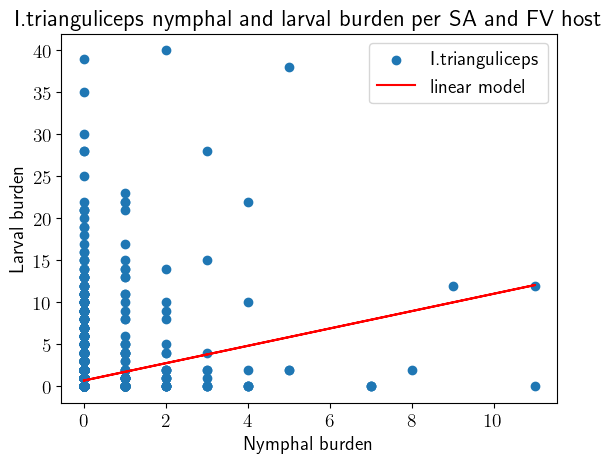

In [13]:
# student distribution confidence intervals
# from here - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
from scipy.stats import t
def tinv(p, df): 
    return abs(t.ppf(p/2, df))

reg_tri = stats.linregress(df["triangulicepsN"], df["triangulicepsL"])
reg_tri_pred_L = reg_tri.intercept + reg_tri.slope*df["triangulicepsN"]
residuals = abs(df["triangulicepsL"] - reg_tri_pred_L)

plt.scatter(df["triangulicepsN"], df["triangulicepsL"], label="I.trianguliceps")
plt.plot(df["triangulicepsN"], reg_tri_pred_L, 'r', label='linear model')
plt.title("I.trianguliceps nymphal and larval burden per SA and FV host")
plt.xlabel("Nymphal burden")
plt.ylabel("Larval burden")
plt.legend()
plt.show()

This looks like it could use a log transform before we do anything to it. But don't log transform values=0, because that will cause $\infty$ issues.

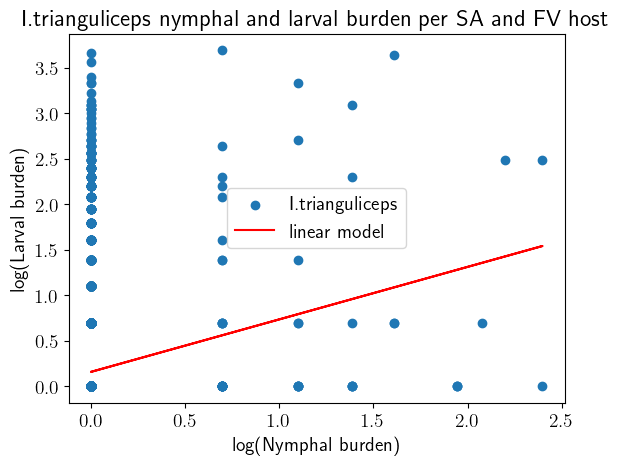

slope (95%): 0.575566 +/- 0.116610
intercept (95%): 0.160081 +/- 0.016527


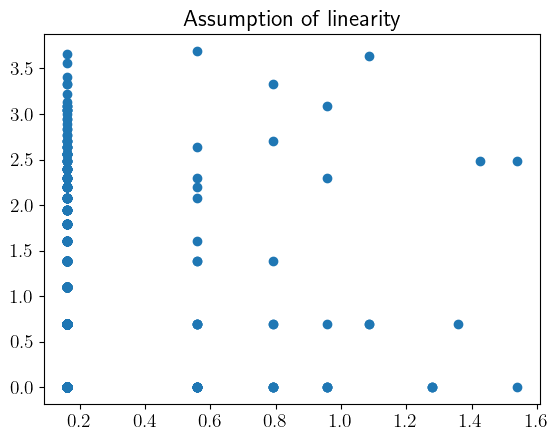

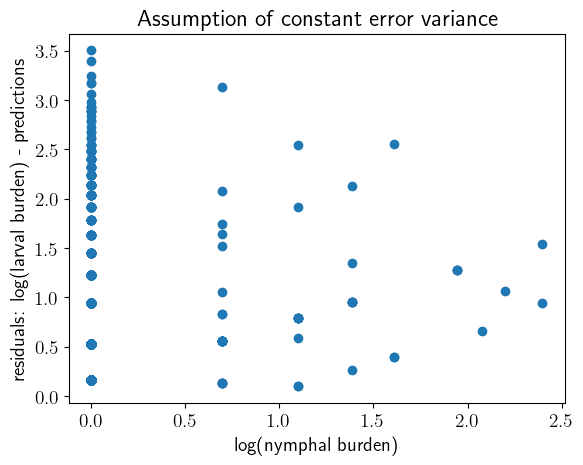

In [14]:
#df_log_transform = df.copy()
#df_log_transform["triangulicepsN"].replace(0,0.0000001)

log_triN = list(df["triangulicepsN"])
for i, elem in enumerate(log_triN):
    if elem != 0:
        log_triN[i] = np.log(log_triN[i])

log_triL = list(df["triangulicepsL"])
for i, elem in enumerate(log_triL):
    if elem != 0:
        log_triL[i] = np.log(log_triL[i])

reg_tri = stats.linregress(log_triN, log_triL)
reg_tri_pred_L = []
for _, log_triN_i in enumerate(log_triN):
    reg_tri_pred_L.append(reg_tri.intercept + reg_tri.slope*log_triN_i)

residuals = abs(np.array(log_triL) - np.array(reg_tri_pred_L))

plt.scatter(log_triN, log_triL, label="I.trianguliceps")
plt.plot(log_triN, reg_tri_pred_L, 'r', label='linear model')
plt.title("I.trianguliceps nymphal and larval burden per SA and FV host")
plt.xlabel("log(Nymphal burden)")
plt.ylabel("log(Larval burden)")
plt.legend()
plt.show()


ts = tinv(0.05, len(df)-2)
print(f"slope (95%): {reg_tri.slope:.6f} +/- {ts*reg_tri.stderr:.6f}")
print(f"intercept (95%): {reg_tri.intercept:.6f} +/- {ts*reg_tri.intercept_stderr:.6f}")

# Assumption: linearity

plt.scatter(reg_tri_pred_L, log_triL)
plt.title("Assumption of linearity")
plt.show()

# Assumption: constant error variance

plt.scatter(log_triN, residuals)
plt.title("Assumption of constant error variance")
plt.xlabel("log(nymphal burden)")
plt.ylabel("residuals: log(larval burden) - predictions")
plt.show()

# Assumption: normally-distributed residuals


So, it appears that this violates the assumption of constant error variance, since the cone shape gets sharper towards larger **log_triN**.

This violates the assumption of linear regression. So, we have insufficient evidence of a linear relationship, and Pearson's Correlation Coefficient would be unreliable.

So, use the Spearman Correlation Coefficient. Note, that it is relevant that some vertebrates have no ticks on them, so consider all observed vertebrates.

$ H_0 $ is no ordinal correlation

$ H_a $ is correlation

Assume $ 0.95 $ confidence

In [15]:
spearman_FV_SA_corr_tri = stats.spearmanr(df["triangulicepsN"], df["triangulicepsL"])
spearman_FV_SA_corr_tri.statistic
spearman_FV_SA_corr_tri.pvalue
print("SPEARMAN CORRELATION TEST: I.trianguliceps nymphs and larvae have ranked correlation of {0:.5f} with p-value={1:.5f}".format(spearman_FV_SA_corr_tri.statistic, spearman_FV_SA_corr_tri.pvalue))

SPEARMAN CORRELATION TEST: I.trianguliceps nymphs and larvae have ranked correlation of 0.12317 with p-value=0.00000


In [16]:
spearman_FV_SA_corr_ric = stats.spearmanr(df["ricinusN"], df["ricinusL"])
spearman_FV_SA_corr_ric.statistic
spearman_FV_SA_corr_ric.pvalue
print("SPEARMAN CORRELATION TEST: I.ricinus nymphs and larvae have ranked correlation of {0:.5f} with p-value={1:.5f}".format(spearman_FV_SA_corr_ric.statistic, spearman_FV_SA_corr_ric.pvalue))

SPEARMAN CORRELATION TEST: I.ricinus nymphs and larvae have ranked correlation of 0.19450 with p-value=0.00000


In [17]:
df_FV = df[df["Species"] == "FV"]
spearman_FV_corr_tri = stats.spearmanr(df_FV["triangulicepsN"], df_FV["triangulicepsL"])
spearman_FV_corr_tri.statistic
spearman_FV_corr_tri.pvalue
print("SPEARMAN CORRELATION TEST: I.trianguliceps nymphs and larvae have ranked correlation of {0:.5f} with p-value={1:.5f}, on FV hosts only".format(spearman_FV_corr_tri.statistic, spearman_FV_corr_tri.pvalue))

SPEARMAN CORRELATION TEST: I.trianguliceps nymphs and larvae have ranked correlation of -0.03027 with p-value=0.10164, on FV hosts only


In [18]:
spearman_FV_corr_ric = stats.spearmanr(df_FV["ricinusN"], df_FV["ricinusL"])
spearman_FV_corr_ric.statistic
spearman_FV_corr_ric.pvalue
print("SPEARMAN CORRELATION TEST: I.ricinus nymphs and larvae have ranked correlation of {0:.5f} with p-value={1:.5f}, on FV hosts only".format(spearman_FV_corr_ric.statistic, spearman_FV_corr_ric.pvalue))

SPEARMAN CORRELATION TEST: I.ricinus nymphs and larvae have ranked correlation of 0.22757 with p-value=0.00000, on FV hosts only


In [19]:
df_SA = df[df["Species"] == "SA"]
spearman_SA_corr_tri = stats.spearmanr(df_SA["triangulicepsN"], df_SA["triangulicepsL"])
spearman_SA_corr_tri.statistic
spearman_SA_corr_tri.pvalue
print("SPEARMAN CORRELATION TEST: I.trianguliceps nymphs and larvae have ranked correlation of {0:.5f} with p-value={1:.5f}, on SA hosts only".format(spearman_SA_corr_tri.statistic, spearman_SA_corr_tri.pvalue))

SPEARMAN CORRELATION TEST: I.trianguliceps nymphs and larvae have ranked correlation of 0.24473 with p-value=0.00000, on SA hosts only


In [20]:
spearman_SA_corr_ric = stats.spearmanr(df_SA["ricinusN"], df_SA["ricinusL"])
spearman_SA_corr_ric.statistic
spearman_SA_corr_ric.pvalue
print("SPEARMAN CORRELATION TEST: I.ricinus nymphs and larvae have ranked correlation of {0:.5f} with p-value={1:.5f}, on SA hosts only".format(spearman_SA_corr_ric.statistic, spearman_SA_corr_ric.pvalue))

SPEARMAN CORRELATION TEST: I.ricinus nymphs and larvae have ranked correlation of 0.13401 with p-value=0.00007, on SA hosts only


With p-values lower than 0.05, then with 95% confidence, we can reject the null hypothesis in these tests (see scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html). The result for FV and trianguliceps, the results are inconclusive: we can't reject the null hypothesis that the two counts have no rank correlation.

In [21]:
# Scipy documentation warns that the method is unreliable when observations < 500
print("Length of data: {0}".format(len(df)))
# Then this looks like the data is large enough for a Spearman Correlation test

Length of data: 3801


### Seasonal variation of data

In [22]:
# First, want to see coincident coaggregation

month = df["Month"]
month_number = []
month_short = []
for one_month in month:
    month_number.append(datetime.strptime(one_month, "%B").strftime('%m'))
    month_short.append(datetime.strptime(one_month, "%B").strftime('%b'))

df.loc[:,"month_number"] = month_number
df.loc[:,"month_short"] = month_short

df_summary = pd.pivot_table(df,
                            index=["Year", "month_number", "month_short"],
                            #index=["Year", "Month"],
                            values=["Larvae", "Nymphs", "ricinusL", "ricinusN", "triangulicepsL", "triangulicepsN"],
                            aggfunc="sum").reset_index()


### Seasonal distributions of larvae and nymphs, both tick species

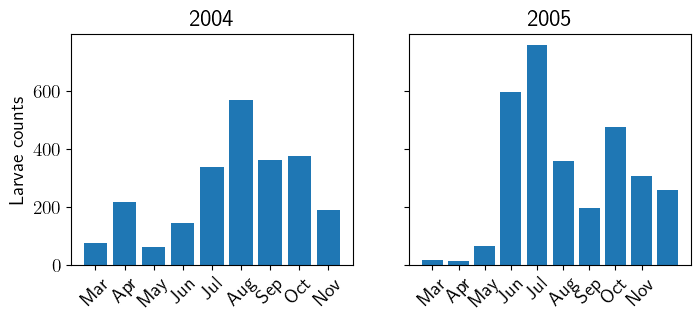

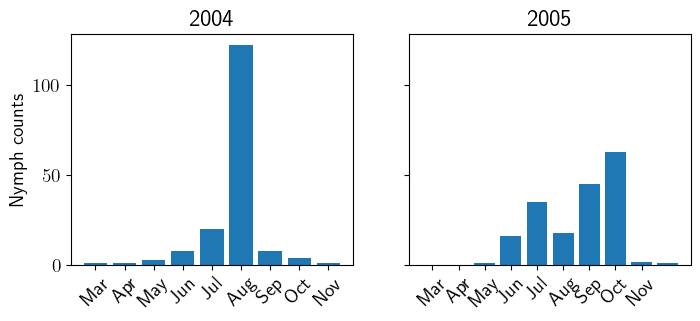

In [23]:
summary_2004 = df_summary[df_summary["Year"] == 2004]
summary_2005 = df_summary[df_summary["Year"] == 2005]

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharey=True)
axs[0].bar(summary_2004["month_short"], summary_2004["Larvae"])
axs[0].set_ylabel("Larvae counts")
axs[0].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[0].set_title("2004")
axs[1].bar(summary_2005["month_short"], summary_2005["Larvae"])
axs[1].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[1].set_title("2005")
plt.show()

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharey=True)
axs[0].bar(summary_2004["month_short"], summary_2004["Nymphs"])
axs[0].set_ylabel("Nymph counts")
axs[0].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[0].set_title("2004")
axs[1].bar(summary_2005["month_short"], summary_2005["Nymphs"])
axs[1].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[1].set_title("2005")
plt.show()

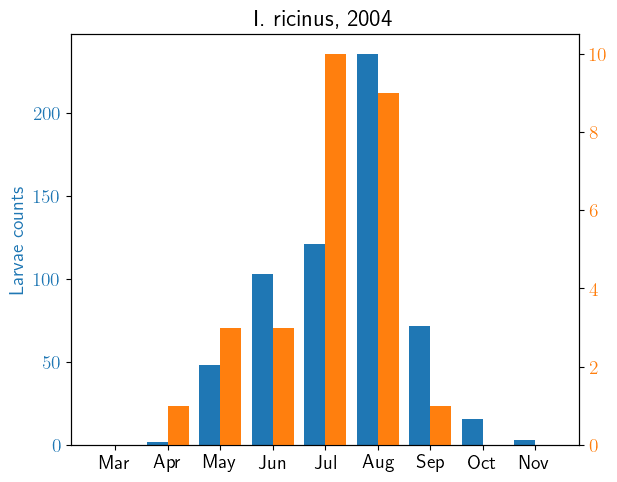

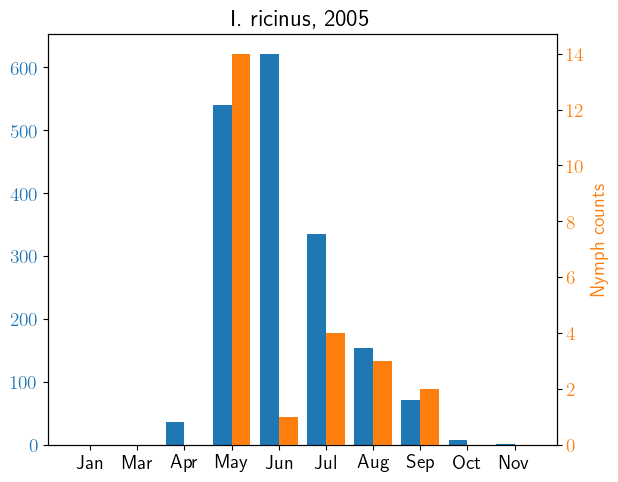

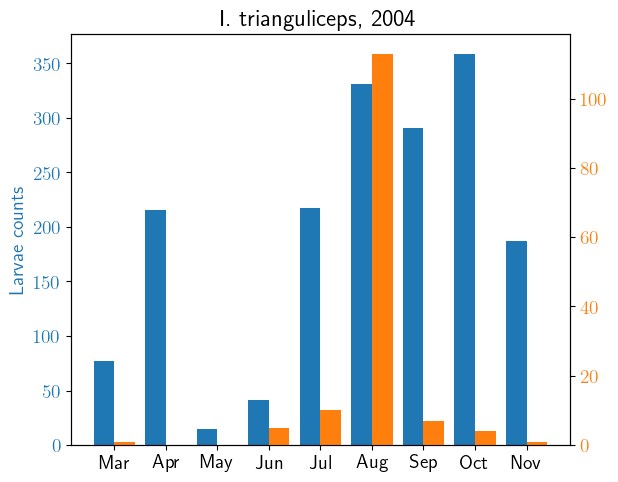

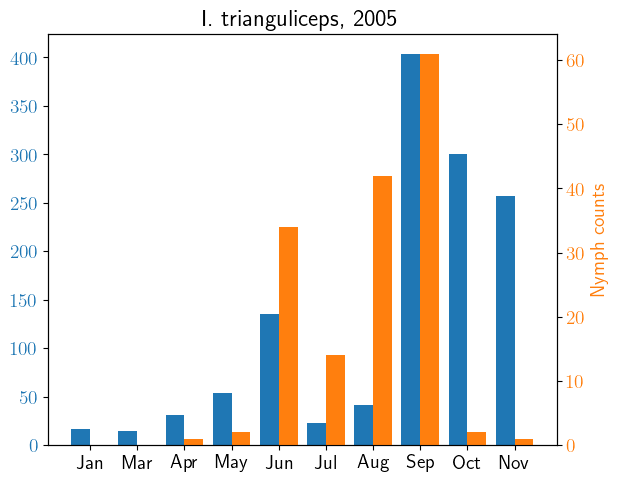

In [25]:
import matplotlib.patches as mpatches

def seasonal_variation(summary, title, nymph_column, larvae_column,
                       legend=False, nymph_axis_label=True, larvae_axis_label=True, save=False):
    width=0.4
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    x=np.arange(len(summary["month_short"]))
    
    ax1.bar(x-width/2,
            summary[larvae_column],
            width=width,
            color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    if larvae_axis_label:
        ax1.set_ylabel("Larvae counts")
        ax1.yaxis.label.set_color('tab:blue')
    ax1.set_xticks(x, summary["month_short"])
        
    ax2.bar(x+width/2,
            summary[nymph_column],
            width=width,
            color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    if nymph_axis_label:
        ax2.set_ylabel("Nymph counts")
        ax2.yaxis.label.set_color('tab:orange')
    
    fig.tight_layout()

    if legend:
        larvae_handle = mpatches.Patch(color='tab:blue', label='Larvae')
        nymphs_handle = mpatches.Patch(color='tab:orange', label='Nymphs')
        handles = [larvae_handle, nymphs_handle]
        plt.legend(handles=handles, loc='upper left')

    plt.title(title)
    if save:
        plt.savefig("figs/{}.png".format(title), dpi=300, bbox_inches="tight")
    else:
        plt.show()

#seasonal_variation(summary_2004, "Seasonal activity of all larvae and nymphs, 2004", "Nymphs", "Larvae", legend=True, nymph_axis_label=False)
#seasonal_variation(summary_2005, "Seasonal activity of all larvae and nymphs, 2005", "Nymphs", "Larvae", larvae_axis_label=False)
seasonal_variation(summary_2004, "I. ricinus, 2004", "ricinusN", "ricinusL", nymph_axis_label=False, save=True)
seasonal_variation(summary_2005, "I. ricinus, 2005", "ricinusN", "ricinusL", larvae_axis_label=False, save=True)
seasonal_variation(summary_2004, "I. trianguliceps, 2004", "triangulicepsN", "triangulicepsL", nymph_axis_label=False, save=True)
seasonal_variation(summary_2005, "I. trianguliceps, 2005", "triangulicepsN", "triangulicepsL", larvae_axis_label=False, save=True)

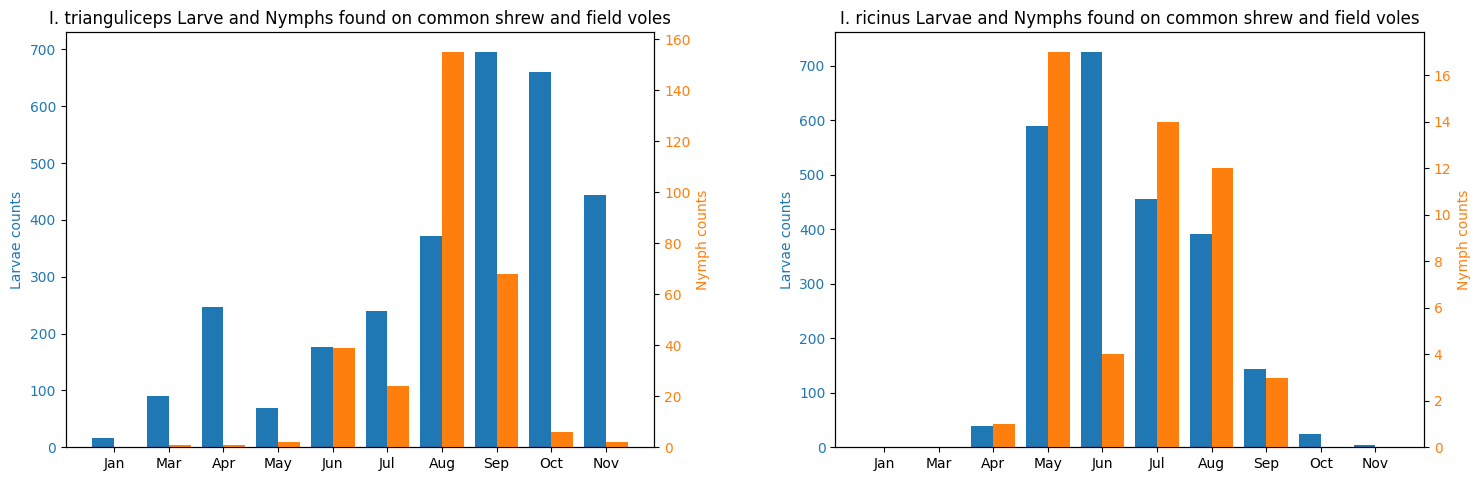

In [23]:
# These are no longer needed, commit then delete

"""
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=False)
bar_width=0.4

# Trianguliceps chart

df_trianguliceps_summary = pd.pivot_table(df,
                                          index=["month_number", "month_short"],
                                          values=["triangulicepsL", "triangulicepsN"],
                                          aggfunc="sum").reset_index()

second_x_axs0 = axs[0].twinx()

x=np.arange(len(df_trianguliceps_summary["month_short"]))

axs[0].bar(x-width/2,
           df_trianguliceps_summary["triangulicepsL"],
           width=bar_width,
           color='tab:blue')
axs[0].tick_params(axis='y', labelcolor='tab:blue')
axs[0].set_ylabel("Larvae counts")
axs[0].set_xticks(x, df_trianguliceps_summary["month_short"])
axs[0].yaxis.label.set_color('tab:blue')

second_x_axs0.bar(x+width/2,
                  df_trianguliceps_summary["triangulicepsN"],
                  width=bar_width,
                  color='tab:orange')
second_x_axs0.tick_params(axis='y', labelcolor='tab:orange')
second_x_axs0.set_ylabel("Nymph counts")
second_x_axs0.yaxis.label.set_color('tab:orange')

axs[0].set_title("I. trianguliceps Larve and Nymphs found on common shrew and field voles")

# Ricinis chart

df_ricinus_summary = pd.pivot_table(df,
                                    index=["month_number", "month_short"],
                                    values=["ricinusL", "ricinusN"],
                                    aggfunc="sum").reset_index()

second_x_axs1 = axs[1].twinx()

x=np.arange(len(df_ricinus_summary["month_short"]))

axs[1].bar(x-width/2,
           df_ricinus_summary["ricinusL"],
           width=bar_width,
           color='tab:blue')
axs[1].tick_params(axis='y', labelcolor='tab:blue')
axs[1].set_ylabel("Larvae counts")
axs[1].set_xticks(x, df_ricinus_summary["month_short"])
axs[1].yaxis.label.set_color('tab:blue')

second_x_axs1.bar(x+width/2,
                  df_ricinus_summary["ricinusN"],
                  width=bar_width,
                  color='tab:orange')
second_x_axs1.tick_params(axis='y', labelcolor='tab:orange')
second_x_axs1.set_ylabel("Nymph counts")
second_x_axs1.yaxis.label.set_color('tab:orange')

fig.tight_layout(pad=5.0)
axs[1].set_title("I. ricinus Larvae and Nymphs found on common shrew and field voles")
plt.show()

# Caption should say something about seasonal tick distributions
"""

### Summary statistics, both tick species and per tick species

In [26]:
# Check that each observation has a different ID, CHECK THAT VERTEBRATES ARE CHIPPED AND ONLY SURVEYED ONCE EACH, OR DO THEY TYPICALLY DIE?
# Is it the case that vertebrates die after they're captured?

ID = df["ID"]
ID_unique = set(ID)
assert(len(ID) == len(ID_unique))

In [27]:
# Most vertebrates don't have any ticks
larvae_aggregated = df[(df["Larvae"] > 0)]
nymphs_aggregated = df[(df["Nymphs"] > 0)]
larvae_nymphs_coaggregated = larvae_aggregated[(larvae_aggregated["Nymphs"] > 0)]
larvae_and_or_nymphs = df[(df["Larvae"] > 0) | (df["Nymphs"] > 0)]

print("Number of SA/FV with some larval burden :", len(larvae_aggregated))
print("Number of SA/FV with some nymphal burden :", len(nymphs_aggregated))
print("Number of SA/FV with some co-aggregation :", len(larvae_nymphs_coaggregated))
print("Number of SA/FV with larvae and or nymph burden :", len(larvae_and_or_nymphs))

print("Proportion of SA/FV with some larval burden: ", len(larvae_aggregated)/len(ID))
print("Proportion of SA/FV with some nymphal burden: ", len(nymphs_aggregated)/len(ID))
print("Proportion of SA/FV with some co-aggregation burden: ", len(larvae_nymphs_coaggregated)/len(ID))
print("Proportion of SA/FV with some larvae and/or nymph burden: ", len(larvae_and_or_nymphs)/len(ID))
print("Proportion of ticky SA/FV that have some co-aggragation burden: ", len(larvae_nymphs_coaggregated)/len(larvae_and_or_nymphs))

Number of SA/FV with some larval burden : 1268
Number of SA/FV with some nymphal burden : 195
Number of SA/FV with some co-aggregation : 131
Number of SA/FV with larvae and or nymph burden : 1332
Proportion of SA/FV with some larval burden:  0.333596421994212
Proportion of SA/FV with some nymphal burden:  0.05130228887134965
Proportion of SA/FV with some co-aggregation burden:  0.03446461457511181
Proportion of SA/FV with some larvae and/or nymph burden:  0.35043409629044986
Proportion of ticky SA/FV that have some co-aggragation burden:  0.09834834834834835
